In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
#from windrose import WindroseAxes
import numpy as np

In [2]:
Years = pd.read_csv('./GCAM_full/20220421_gcam_production.csv')
Years = Years.columns.values.tolist()[5:-1] ## string

root = './Exps-tax/'

In [3]:
data = pd.DataFrame()
for year in Years:
    path = root + 'SSP2/all_rates_'+ str(year) + '.csv'
    data0 = pd.read_csv(path)
    data = pd.concat([data,data0])
data0 = data.query('Tax == 0')
data1 = data.query('Tax == 1')
data0

,Scenario,Year,Rates,Demand_China,Demand_ROW,OBJ_Values,Revenue_Total,Cost_Total,Cost_Operation,Cost_Holding,...,Quantity_Y_Rail_Export,Quantity_Z_Export_Import,China_Price,ROW_Price,Revenue_Domestic,Revenue_China,Revenue_Row,Subsidy,Tax,Runtime
1,SSP2,1990,1_1_1_10,9414617,7531693,51080565422,61604710280,10524144857,1159025,2890175925,...,15070448,16946311,2476,1592,24982381744,23312581263,11993925131,1315822140,0,4.574467
1,SSP2,2005,1_1_1_10,26590000,21272000,281227587239,307299268451,26071681212,9522396,4343816480,...,39878245,47862000,2472,1588,204037534552,65755684661,33790057643,3715991595,0,5.180771
1,SSP2,2010,1_1_1_10,54800000,43840000,1033645645539,1083887061592,50241416052,22863364,5273582360,...,80754075,98640000,2467,1581,871656147453,135223822400,69351859424,7655232315,0,18.801376
1,SSP2,2015,1_1_1_10,81691900,65353520,2184978135915,2258475057460,73496921544,35024928,6309284135,...,118973699,147045420,2462,1575,1942916029754,201164550560,102977030347,11417446797,0,18.043964
1,SSP2,2020,1_1_1_10,100314500,80251600,3030757576333,3120094581967,89337005633,47441562,6665585871,...,145652518,180566100,2458,1571,2733783245523,246667361207,126105096008,13538879228,0,19.084728
1,SSP2,2025,1_1_1_10,117320663,93856530,3870425643158,3974419019829,103993376671,60282761,7091187375,...,169354879,211177193,2455,1567,3523832390574,288105417308,147113195064,15368016882,0,19.580471
1,SSP2,2030,1_1_1_10,149734199,119787359,5827781370404,5958673206155,130891835750,82185274,6916473268,...,213912822,269521558,2449,1559,5386040622426,366781483348,186857064662,18994035718,0,20.282621
1,SSP2,2035,1_1_1_10,191102997,152882398,8704732714152,8870104024784,165371310631,109249390,6645147505,...,263557755,343985396,2441,1550,8143125264550,466614361385,237014928262,23349470584,0,19.548389
1,SSP2,2040,1_1_1_10,243901232,195120986,13042921191340,13252673359249,209752167908,144131530,6566104855,...,319653939,439022219,2431,1538,12330753839136,593084570862,300107708848,28727240400,0,19.287552
1,SSP2,2045,1_1_1_10,311286646,249029317,19667528781963,19933633152049,266104370084,189363950,6245446598,...,407640826,560315963,2418,1522,18766113097356,752957428697,379128756659,35433869333,0,21.677515


In [4]:
# y0 = data0['Demand_China'] / data0['Demand_ROW'].to_numpy()
# y1 = data1['Demand_China'] / data1['Demand_ROW'].to_numpy()
y0 = data0['OBJ_Values'].to_numpy()
y1 = data1['OBJ_Values'].to_numpy()

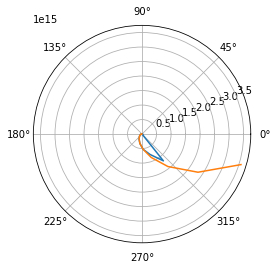

In [5]:
N = 21
x = np.linspace(0.0, 2 * np.pi, N,endpoint=False)
#y = data0['Revenue_Total'] /1e10

width = np.pi / 15
plt.gca(polar=True)
#plt.bar(x, y, width=width,alpha=0.5)
plt.plot(x,y0)
plt.plot(x,y1)
plt.show()

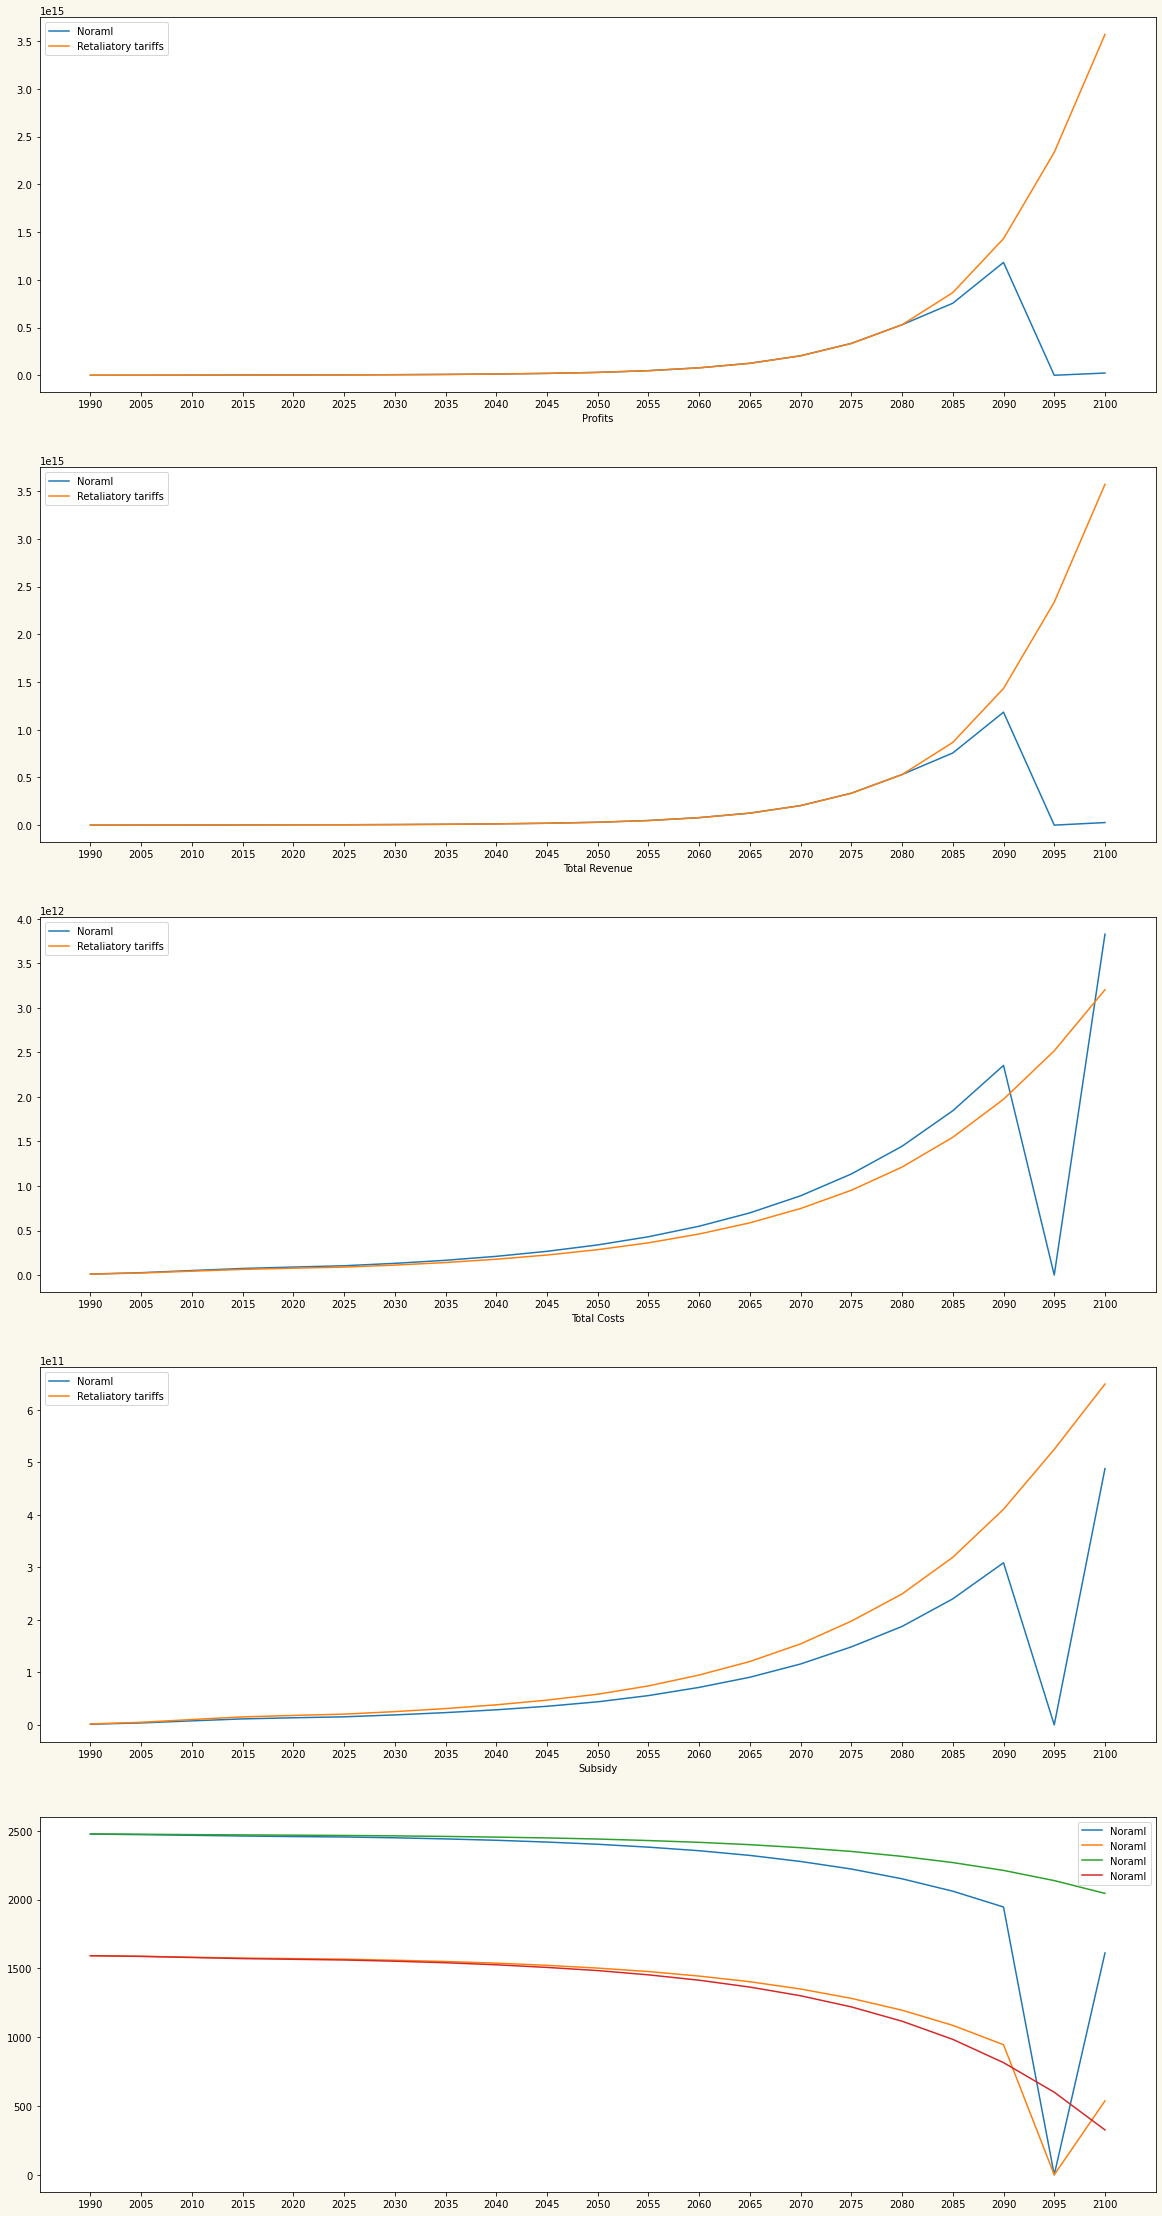

In [17]:
def plot(ax, Y, Label, title=None):

    # ax.bar(data['Year'], data['OBJ_Values'] / 1e15)
    # ax.bar(data['Year']+2, data['Revenue_Total'] / 1e15)
    # ax.bar(data['Year']+4, data['Cost_Total'] /1e12)
    ax.plot(Years, Y, label=Label)
    ax.legend()
    ax.set_xlabel(title)


data0 = data.query('Tax == 0')
data1 = data.query('Tax == 1')
labels = ['Noraml', 'Retaliatory tariffs']

fig = plt.figure(figsize=(20, 40), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(5, 1)

ax = plt.subplot(gs[0,0])
y0 = data0['OBJ_Values']
y1 = data1['OBJ_Values']

plot(ax, y0, labels[0])
plot(ax, y1, labels[1], 'Profits')


ax = plt.subplot(gs[1,:])
y0 = data0['Revenue_Total']
y1 = data1['Revenue_Total']

plot(ax, y0, labels[0])
plot(ax, y1, labels[1], 'Total Revenue')


ax = plt.subplot(gs[2,:])
y0 = data0['Cost_Total']
y1 = data1['Cost_Total']

plot(ax, y0, labels[0])
plot(ax, y1, labels[1],'Total Costs')


ax = plt.subplot(gs[3,:])
y0 = data0['Subsidy']
y1 = data1['Subsidy']

plot(ax, y0, labels[0])
plot(ax, y1, labels[1],'Subsidy')

ax = plt.subplot(gs[4,:])
y0_1 = data0['China_Price']
y0_2 = data0['ROW_Price']

y1_1 = data1['China_Price']
y1_2 = data1['ROW_Price']

plot(ax, y0_1, labels[0])
plot(ax, y0_2, labels[0])
plot(ax, y1_1, labels[0])
plot(ax, y1_2, labels[0])
